In [141]:
#Looking at Death Rate Data per European country 
import json
import requests
import pandas as pd
from pprint import pprint

#For calculating and charting
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib notebook
%matplotlib inline

mortalitydata = pd.read_csv('Mortality_rate_data.csv')
mortalitydata.head()


,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGAIRBODA,Ambient and household air pollution attributab...,numeric,AMR,Americas,Country,ATG,Antigua and Barbuda,Year,2019,...,NaN,NaN,0.056,NaN,0.41,0 [0-0],NaN,NaN,EN,2024-10-03T04:00:00.000Z
1,SDGAIRBODA,Ambient and household air pollution attributab...,numeric,AMR,Americas,Country,ATG,Antigua and Barbuda,Year,2019,...,NaN,NaN,0.024,NaN,0.18,0 [0-0],NaN,NaN,EN,2024-10-03T04:00:00.000Z
2,SDGAIRBODA,Ambient and household air pollution attributab...,numeric,AMR,Americas,Country,BHS,Bahamas,Year,2019,...,NaN,NaN,0.000,NaN,0.24,0 [0-0],NaN,NaN,EN,2024-10-03T04:00:00.000Z
3,SDGAIRBODA,Ambient and household air pollution attributab...,numeric,AMR,Americas,Country,BHS,Bahamas,Year,2019,...,NaN,NaN,0.000,NaN,0.13,0 [0-0],NaN,NaN,EN,2024-10-03T04:00:00.000Z
4,SDGAIRBODA,Ambient and household air pollution attributab...,numeric,AMR,Americas,Country,BHS,Bahamas,Year,2019,...,NaN,NaN,0.000,NaN,0.39,0 [0-0],NaN,NaN,EN,2024-10-03T04:00:00.000Z


In [107]:
#Appending Data to Lists to be used in Dataframe

main_location = []
location = []
year = []
dim1 = []
dim2 = []
fact_value_numeric = []

for index, row in mortalitydata.iterrows():
    main_location.append(row["ParentLocation"])
    location.append(row["Location"])
    year.append(row["Period"])
    dim1.append(row["Dim1"])
    dim2.append(row["Dim2"])
    fact_value_numeric.append(row["FactValueNumeric"])

In [108]:
#Creating Dataframe with extracted data

mortality_dict = {
    "Continent": main_location,
    "Country": location,
    "Year": year,
    "Gender": dim1,
    "Condition": dim2,
    "Rate": fact_value_numeric
}
mortality_data = pd.DataFrame(mortality_dict)
mortality_data

,Continent,Country,Year,Gender,Condition,Rate
0,Americas,Antigua and Barbuda,2019,Both sexes,"Trachea, bronchus, lung cancers",0.190
1,Americas,Antigua and Barbuda,2019,Female,"Trachea, bronchus, lung cancers",0.084
2,Americas,Bahamas,2019,Both sexes,"Trachea, bronchus, lung cancers",0.079
3,Americas,Bahamas,2019,Female,"Trachea, bronchus, lung cancers",0.042
4,Americas,Bahamas,2019,Male,"Trachea, bronchus, lung cancers",0.130
...,...,...,...,...,...,...
32395,Americas,Bolivia (Plurinational State of),2010,Male,ALL CAUSES,96.720
32396,Europe,Kazakhstan,2010,Female,ALL CAUSES,97.770
32397,Africa,Guinea,2010,Female,Acute lower respiratory infections,98.220
32398,Eastern Mediterranean,Pakistan,2010,Both sexes,Ischaemic heart disease,99.230


In [109]:
#Cleaning Dataframe
#Filtering to Countries that are Europe and Central Asia

mortality_data_summary = mortality_data.loc[mortality_data["Continent"] == "Europe",:]
print(mortality_data_summary)

      Continent       Country  Year      Gender  \
9        Europe       Estonia  2019      Female   
10       Europe       Estonia  2019      Female   
11       Europe       Finland  2019  Both sexes   
12       Europe       Finland  2019  Both sexes   
13       Europe       Finland  2019      Female   
...         ...           ...   ...         ...   
32346    Europe       Georgia  2010        Male   
32376    Europe       Armenia  2010  Both sexes   
32380    Europe  Turkmenistan  2010      Female   
32391    Europe    Kazakhstan  2010        Male   
32396    Europe    Kazakhstan  2010      Female   

                                   Condition   Rate  
9            Trachea, bronchus, lung cancers   0.19  
10     Chronic obstructive pulmonary disease   0.13  
11        Acute lower respiratory infections   0.12  
12           Trachea, bronchus, lung cancers   0.22  
13        Acute lower respiratory infections   0.10  
...                                      ...    ...  
32346    

In [110]:
#Removing Blank Values & Resetting Index - not sure why its not working

continent_mortality_data = mortality_data[mortality_data["Continent"].notna()]
continent_mortality_data = mortality_data.dropna()
continent_mortality_data = mortality_data.reset_index(drop=True)
continent_mortality_data

,Continent,Country,Year,Gender,Condition,Rate
0,Americas,Antigua and Barbuda,2019,Both sexes,"Trachea, bronchus, lung cancers",0.190
1,Americas,Antigua and Barbuda,2019,Female,"Trachea, bronchus, lung cancers",0.084
2,Americas,Bahamas,2019,Both sexes,"Trachea, bronchus, lung cancers",0.079
3,Americas,Bahamas,2019,Female,"Trachea, bronchus, lung cancers",0.042
4,Americas,Bahamas,2019,Male,"Trachea, bronchus, lung cancers",0.130
...,...,...,...,...,...,...
32395,Americas,Bolivia (Plurinational State of),2010,Male,ALL CAUSES,96.720
32396,Europe,Kazakhstan,2010,Female,ALL CAUSES,97.770
32397,Africa,Guinea,2010,Female,Acute lower respiratory infections,98.220
32398,Eastern Mediterranean,Pakistan,2010,Both sexes,Ischaemic heart disease,99.230


In [111]:
continent_mortality_data.sort_values(by="Rate", ascending=True)
continent_mortality_data

,Continent,Country,Year,Gender,Condition,Rate
0,Americas,Antigua and Barbuda,2019,Both sexes,"Trachea, bronchus, lung cancers",0.190
1,Americas,Antigua and Barbuda,2019,Female,"Trachea, bronchus, lung cancers",0.084
2,Americas,Bahamas,2019,Both sexes,"Trachea, bronchus, lung cancers",0.079
3,Americas,Bahamas,2019,Female,"Trachea, bronchus, lung cancers",0.042
4,Americas,Bahamas,2019,Male,"Trachea, bronchus, lung cancers",0.130
...,...,...,...,...,...,...
32395,Americas,Bolivia (Plurinational State of),2010,Male,ALL CAUSES,96.720
32396,Europe,Kazakhstan,2010,Female,ALL CAUSES,97.770
32397,Africa,Guinea,2010,Female,Acute lower respiratory infections,98.220
32398,Eastern Mediterranean,Pakistan,2010,Both sexes,Ischaemic heart disease,99.230


In [160]:
sort_mortality = mortality_data.loc[
    (mortality_data["Continent"] == "Europe") & (mortality_data["Year"] == 2019),:]
sort_mortality_values = sort_mortality.sort_values(by="Rate", ascending=False)
sort_mortality_values.head(10)

#sort_mortality = mortality_data.loc[mortality_data["Continent"] == "Europe",:].sort_values(by="Rate", ascending=False)
#sort_mortality.head(20)

,Continent,Country,Year,Gender,Condition,Rate
1507,Europe,Tajikistan,2019,Male,ALL CAUSES,229.5
1421,Europe,Tajikistan,2019,Both sexes,ALL CAUSES,201.4
1042,Europe,Uzbekistan,2019,Male,ALL CAUSES,182.0
1008,Europe,Tajikistan,2019,Female,ALL CAUSES,177.2
910,Europe,Kyrgyzstan,2019,Male,ALL CAUSES,159.2
900,Europe,Uzbekistan,2019,Both sexes,ALL CAUSES,154.0
894,Europe,Tajikistan,2019,Male,Ischaemic heart disease,151.2
832,Europe,Azerbaijan,2019,Male,ALL CAUSES,144.2
828,Europe,Montenegro,2019,Male,ALL CAUSES,143.8
766,Europe,Bosnia and Herzegovina,2019,Male,ALL CAUSES,137.7


In [166]:
sort_mortality["Rate"].describe()

count    882.000000
mean      16.505578
std       29.493625
min        0.100000
25%        1.462500
50%        4.045000
75%       15.457500
max      229.500000
Name: Rate, dtype: float64

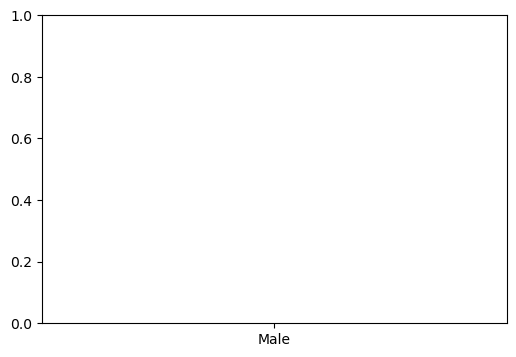

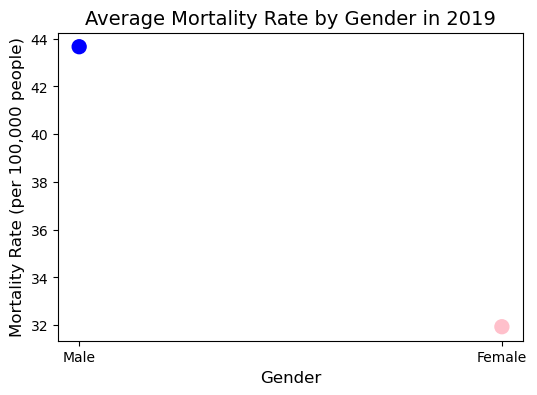

In [182]:
#SCATTERPLOT - MORTALITY RATE PER GENDER

# Data for mortality rates per gender in 2019
male_data = mortality_data[mortality_data["Gender"] == "Male"]
female_data = mortality_data[mortality_data["Gender"] == "Female"]
mortality_rates = [male_data["Rate"].mean(), female_data["Rate"].mean()]

#Scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(["Male", "Female"], mortality_rates, color=['blue', 'pink'], s=100)

# Add labels and title
plt.title('Average Mortality Rate by Gender in 2019', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Mortality Rate (per 100,000 people)', fontsize=12)


plt.show()

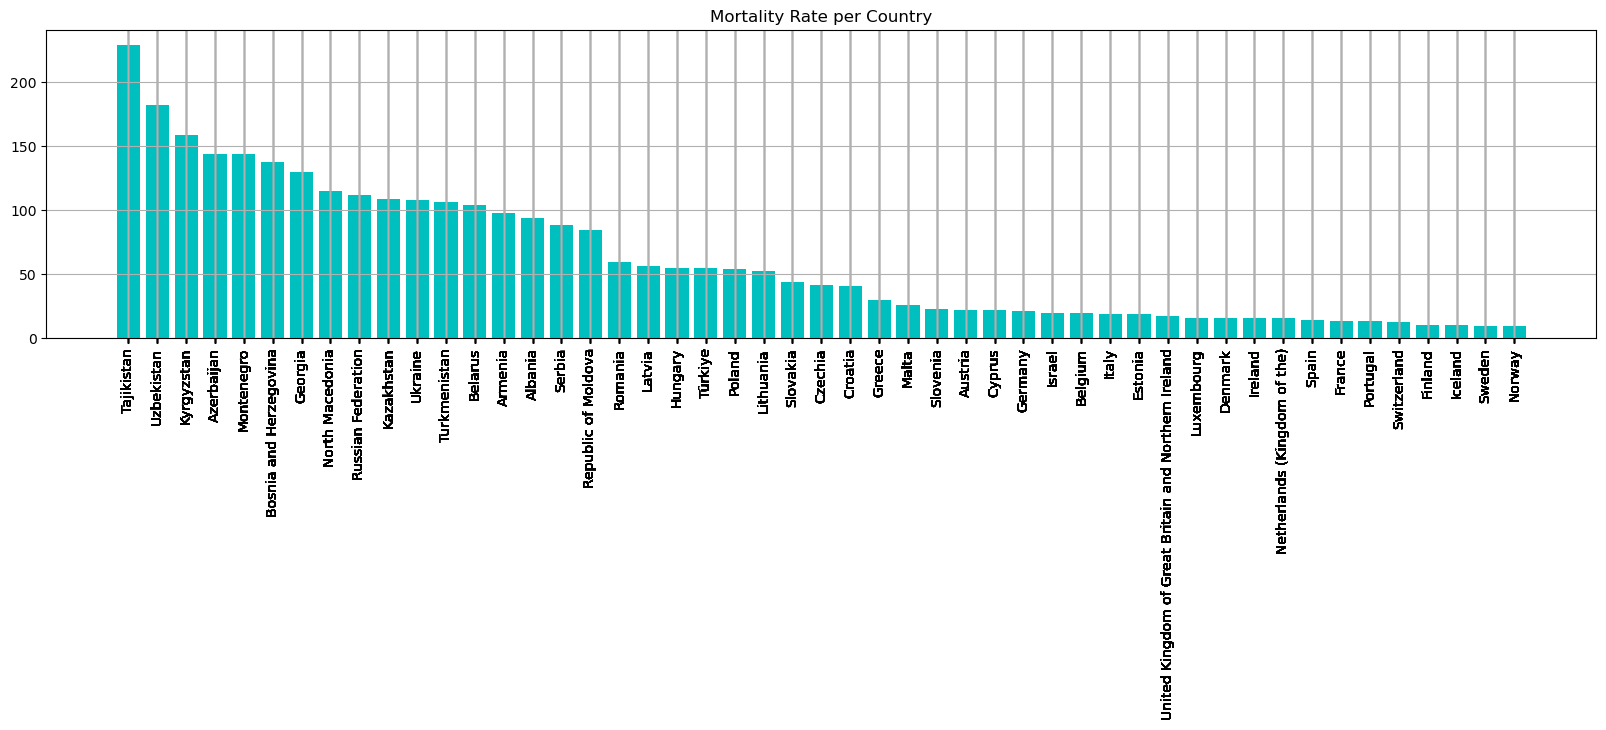

In [164]:
#Plot per death rate in 2019
country = sort_mortality_values["Country"]
mortality_rate = sort_mortality_values["Rate"]

plt.figure(figsize = (20,4))
plt.bar(country, mortality_rate, color = "c")
plt.xticks(country, rotation="vertical")
plt.grid()
plt.title("Mortality Rate per Country")
plt.show()

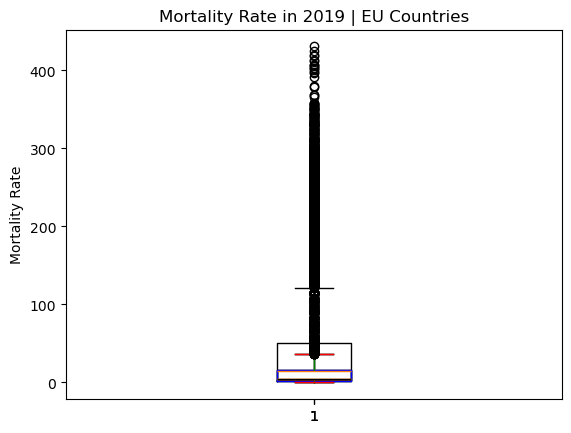

In [186]:
#Box and Whisker:

total_mortality = sort_mortality["Rate"]

# Create box plot
box = plt.boxplot(total_mortality)

# Customize box plot by accessing components
for whisker in box['whiskers']:
    whisker.set(color='green')  # Change whisker color
for cap in box['caps']:
    cap.set(color='red')        # Change cap color
for box_element in box['boxes']:
    box_element.set(color='blue')  # Change box color
for median in box['medians']:
    median.set(color='black')    # Change median color

plt.show()

In [159]:
#Average mortality rate for male and female
#Minimum

#pie chart (remove all causes in 2019) or compare per year


male_mortality = sort_mortality_values.loc[(sort_mortality_values["Gender"] == "Male")]
print(male_mortality)
#Plot mortality per gender - top 10 countries



#top_10 = sort_mortality_values.sort_values('Country', ascending=False).head(10)
#print(top_10)

#gender = top_10["Gender"]
#country = top_10["Country"]
#mortality_rate = top_10["Rate"]

#plt.figure(figsize=(10, 10))
#sns.barplot(x='Rate', y='Country', hue='Gender', data=top_10, palette='coolwarm')
#plt.title('Gender Mortality Rates by Country in Europe (2019)', fontsize=14)
#plt.xlabel('Mortality Rate (per 100,000)', fontsize=12)
#plt.ylabel('Country', fontsize=12)
#plt.show()

     Continent     Country  Year Gender  \
1507    Europe  Tajikistan  2019   Male   
1042    Europe  Uzbekistan  2019   Male   
910     Europe  Kyrgyzstan  2019   Male   
894     Europe  Tajikistan  2019   Male   
832     Europe  Azerbaijan  2019   Male   
...        ...         ...   ...    ...   
47      Europe     Finland  2019   Male   
52      Europe     Iceland  2019   Male   
46      Europe     Finland  2019   Male   
75      Europe      Sweden  2019   Male   
15      Europe     Finland  2019   Male   

                                  Condition    Rate  
1507                             ALL CAUSES  229.50  
1042                             ALL CAUSES  182.00  
910                              ALL CAUSES  159.20  
894                 Ischaemic heart disease  151.20  
832                              ALL CAUSES  144.20  
...                                     ...     ...  
47    Chronic obstructive pulmonary disease    0.44  
52          Trachea, bronchus, lung cancers    0.32

In [ ]:
#What is the most affected gender

#Summary of last 10 years
